# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
#url = "https://api.openweathermap.org/data/3.0/onecall"
#?lat={lat}&lon={lon}&appid={API key}
url = "https://api.openweathermap.org/data/2.5/weather/?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
   
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url =  YOUR CODE HERE
    city_url = url + "q=" + city +"&appid=" + weather_api_key
    response = requests.get(city_url)
    response_json = response.json()
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response_json["weather"]
            
        # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json['coord']['lat']
        city_lng = response_json['coord']['lon']
        city_max_temp = response_json['main']['temp_max']
        city_humidity = response_json['main']['humidity']
        city_clouds = response_json['clouds']['all']
        city_wind = response_json['wind']['speed']
        city_country = response_json['sys']['country']
        city_date = response_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | afif
Processing Record 2 of Set 1 | mek'ele
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | mahina
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | saipan
Processing Record 8 of Set 1 | newman
Processing Record 9 of Set 1 | moranbah
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | klaksvik
Processing Record 12 of Set 1 | malvan
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | vadso
Processing Record 15 of Set 1 | antofagasta
Processing Record 16 of Set 1 | port shepstone
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | isafjordur
Processing Record 22 of Set 1 | zaozersk
Proces

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#def convert_fahrenheit_to_celsius(fahrenheit):
city_data_df["Max Temp"] = (city_data_df["Max Temp"]-32)*5/9

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,afif,23.9065,42.9172,154.950000,8,0,2.72,SA,1720099285
1,mek'ele,13.4967,39.4753,146.655556,49,69,5.41,ET,1720099287
2,waitangi,-43.9535,-176.5597,138.238889,96,48,0.89,NZ,1720099289
3,mahina,-17.5065,-149.4890,147.166667,78,6,11.19,PF,1720099291
4,college,64.8569,-147.8028,141.400000,75,96,0.89,US,1720099269


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,afif,23.9065,42.9172,154.950000,8,0,2.72,SA,1720099285
1,mek'ele,13.4967,39.4753,146.655556,49,69,5.41,ET,1720099287
2,waitangi,-43.9535,-176.5597,138.238889,96,48,0.89,NZ,1720099289
3,mahina,-17.5065,-149.4890,147.166667,78,6,11.19,PF,1720099291
4,college,64.8569,-147.8028,141.400000,75,96,0.89,US,1720099269


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

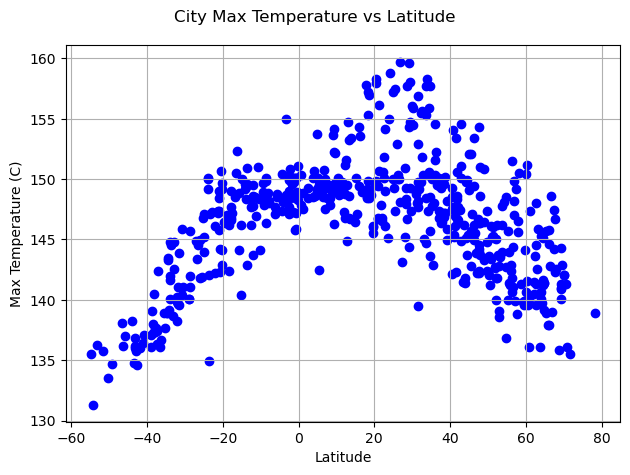

In [9]:
# Build scatter plot for latitude vs. temperature

scatr_plotx=city_data_df["Lat"]
scatr_ploty=city_data_df["Max Temp"]
#scatr_ploty = float(city_data_df["Max Temp"] - 32) * 5 / 9
plt.scatter(scatr_plotx,scatr_ploty,marker="o", facecolors="blue")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.suptitle('City Max Temperature vs Latitude')
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

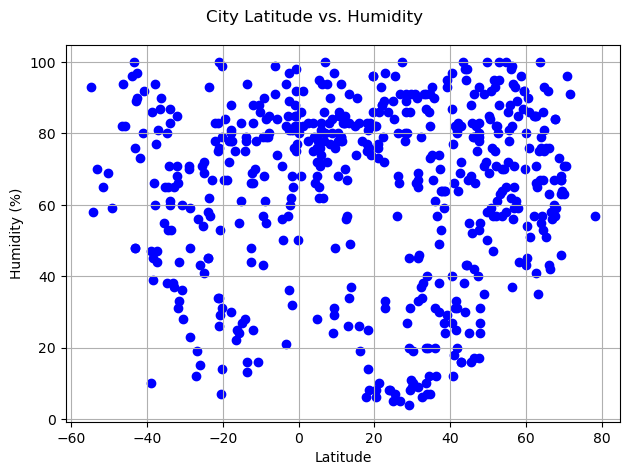

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
scatr_plotx=city_data_df["Lat"]
scatr_ploty=city_data_df["Humidity"]
plt.scatter(scatr_plotx,scatr_ploty,marker="o", facecolors="blue")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.suptitle('City Latitude vs. Humidity')
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

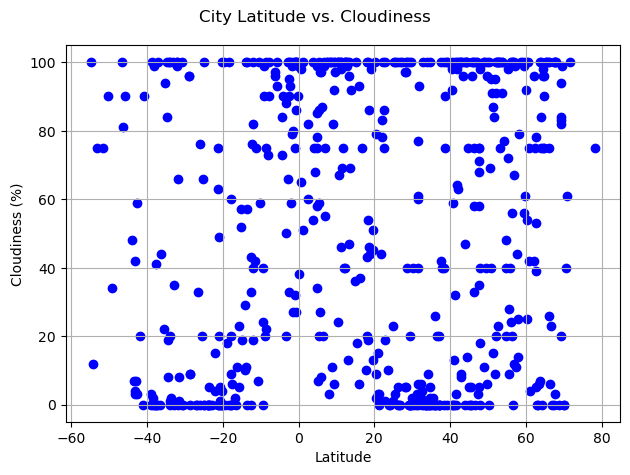

In [11]:
# Build the scatter plots for latitude vs. cloudiness
scatr_plotx=city_data_df["Lat"]
scatr_ploty=city_data_df["Cloudiness"]
plt.scatter(scatr_plotx,scatr_ploty,marker="o", facecolors="blue")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.suptitle('City Latitude vs. Cloudiness')
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

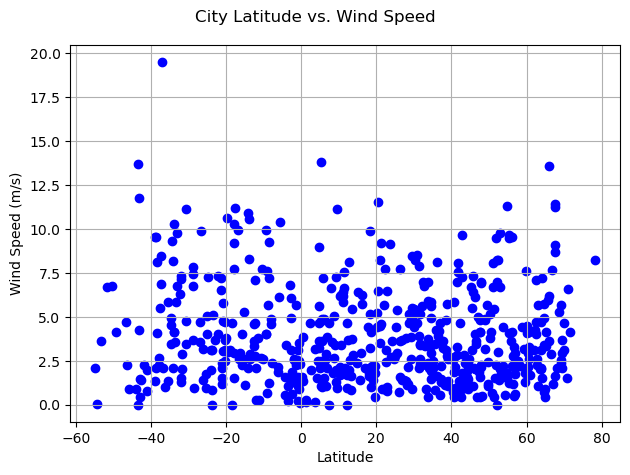

In [12]:
# Build the scatter plots for latitude vs. wind speed
scatr_plotx=city_data_df["Lat"]
scatr_ploty=city_data_df["Wind Speed"]
plt.scatter(scatr_plotx,scatr_ploty,marker="o", facecolors="blue")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.suptitle('City Latitude vs. Wind Speed')
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,afif,23.9065,42.9172,154.950000,8,0,2.72,SA,1720099285
1,mek'ele,13.4967,39.4753,146.655556,49,69,5.41,ET,1720099287
4,college,64.8569,-147.8028,141.400000,75,96,0.89,US,1720099269
5,tiksi,71.6872,128.8694,135.472222,91,100,4.14,RU,1720099294
6,saipan,15.1355,145.7010,150.083333,74,100,6.39,MP,1720099296


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,138.238889,96,48,0.89,NZ,1720099289
3,mahina,-17.5065,-149.4890,147.166667,78,6,11.19,PF,1720099291
8,moranbah,-22.0016,148.0466,142.205556,83,15,7.32,AU,1720099300
9,adamstown,-25.0660,-130.1015,145.194444,69,100,4.04,PN,1720099302
14,antofagasta,-23.6500,-70.4000,142.083333,62,0,0.81,CL,1720099311


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.3561976278543472


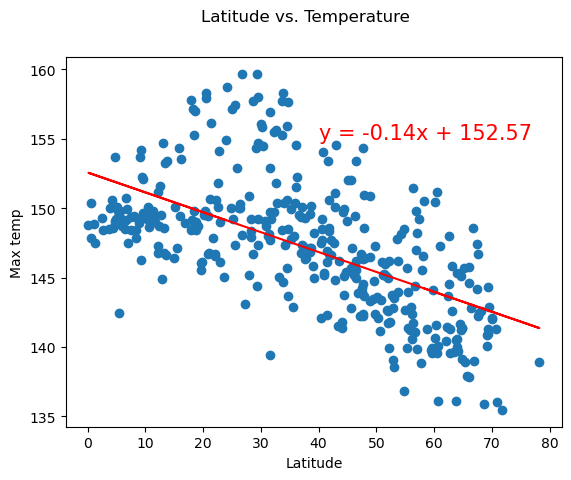

In [15]:
# Linear regression on Northern Hemisphere

lr_nh_plotx=northern_hemi_df["Lat"]
lr_nh_ploty=northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lr_nh_plotx,lr_nh_ploty)
lr_values = lr_nh_plotx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(lr_nh_plotx,lr_nh_ploty)
plt.plot(lr_nh_plotx,lr_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max temp")
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(40,155),fontsize=15,color="red")
plt.suptitle('Latitude vs. Temperature')
#plt.tight_layout()
plt.show()

The r-value is 0.7477967569549667


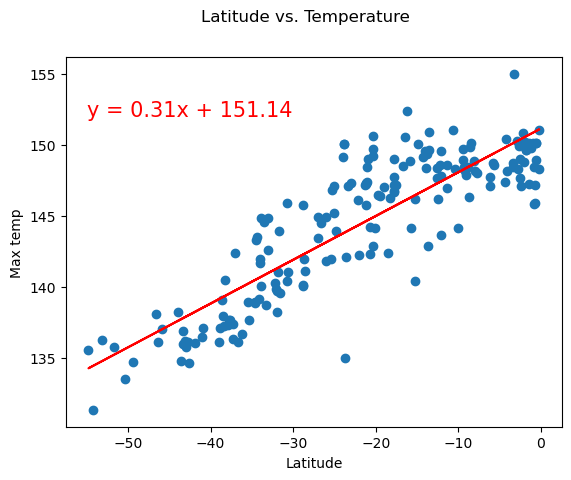

In [16]:
# Linear regression on Southern Hemisphere
lr_sh_plotx=southern_hemi_df["Lat"]
lr_sh_ploty=southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lr_sh_plotx,lr_sh_ploty)
lr_values = lr_sh_plotx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(lr_sh_plotx,lr_sh_ploty)
plt.plot(lr_sh_plotx,lr_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max temp")
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-55,152),fontsize=15,color="red")
plt.suptitle('Latitude vs. Temperature')
#plt.tight_layout()
plt.show()

**Discussion about the linear relationship:
It is observed that as the latitude increases, the temperature seems to be increasing gradually. But when the latitude is between 20-30, the temperature has shot more than the normal trend. It is also noted that in the southern hemisphere, the model takes in to consideration about 69.7% data where as the northern hemisphere data is around 35% of data for mapping the trend. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 2.743386550904764e-05


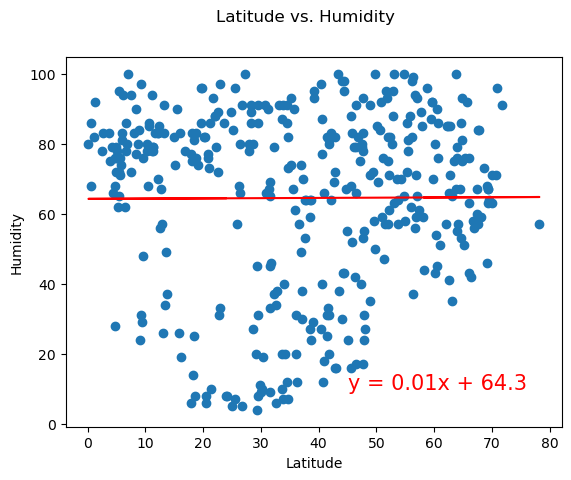

In [17]:
# Northern Hemisphere
lh_nh_plotx=northern_hemi_df["Lat"]
lh_nh_ploty=northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lh_nh_plotx,lh_nh_ploty)
lr_values = lh_nh_plotx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(lh_nh_plotx,lh_nh_ploty)
plt.plot(lh_nh_plotx,lr_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.suptitle('Latitude vs. Humidity')
#plt.tight_layout()
plt.show()

The r-value is 0.0032782520484390875


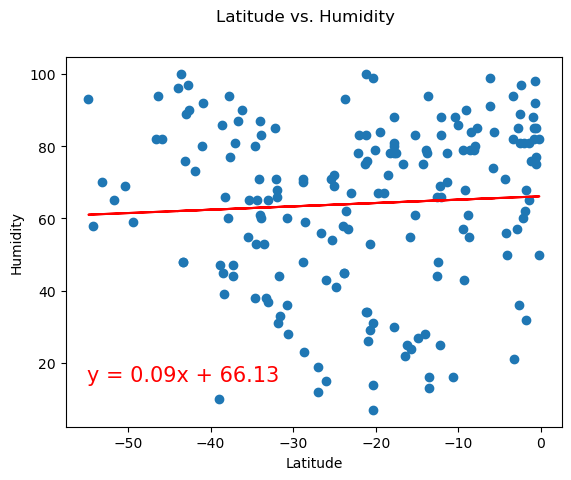

In [18]:
# Southern Hemisphere
lh_sh_plotx=southern_hemi_df["Lat"]
lh_sh_ploty=southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lh_sh_plotx,lh_sh_ploty)
lr_values = lh_sh_plotx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(lh_sh_plotx,lh_sh_ploty)
plt.plot(lh_sh_plotx,lr_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.suptitle('Latitude vs. Humidity')
#plt.tight_layout()
plt.show()

**Discussion about the linear relationship: 
It is observed that the humidity almost remained constant with the change in latitude across northern and southern hemispheres for the cities that are selected in the dataset. It is also noted that humidity is 80-100 for the cities that are in the latitude of -10 and 0

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.0002717536386117002


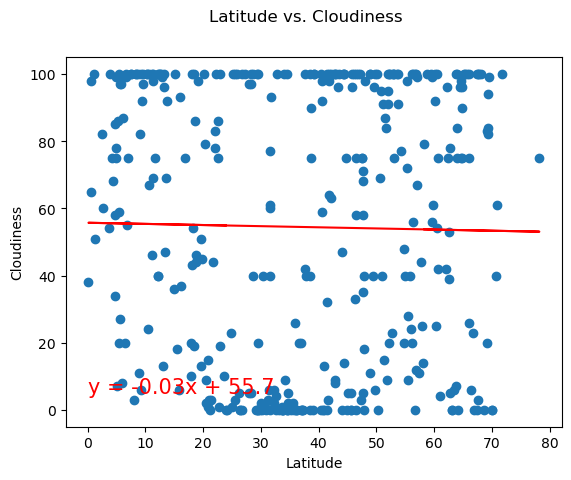

In [19]:
# Northern Hemisphere

lc_nh_plotx=northern_hemi_df["Lat"]
lc_nh_ploty=northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lc_nh_plotx,lc_nh_ploty)
lr_values = lc_nh_plotx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(lc_nh_plotx,lc_nh_ploty)
plt.plot(lc_nh_plotx,lr_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.suptitle('Latitude vs. Cloudiness')
#plt.tight_layout()
plt.show()

The r-value is 0.06476358273974378


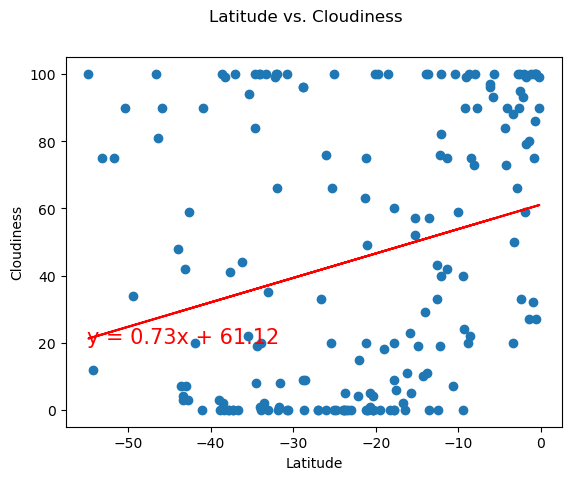

In [20]:
# Southern Hemisphere

lc_sh_plotx=southern_hemi_df["Lat"]
lc_sh_ploty=southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lc_sh_plotx,lc_sh_ploty)
lr_values = lc_sh_plotx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(lc_sh_plotx,lc_sh_ploty)
plt.plot(lc_sh_plotx,lr_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.suptitle('Latitude vs. Cloudiness')
#plt.tight_layout()
plt.show()

**Discussion about the linear relationship:
It is observed that the cloudiness in southern hemisphere is more in the latitude between -10 and 0 but the cloudiness line remained more or less constant at different latitudes. Also the cloudiness seems to be more in northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0021284917253454974


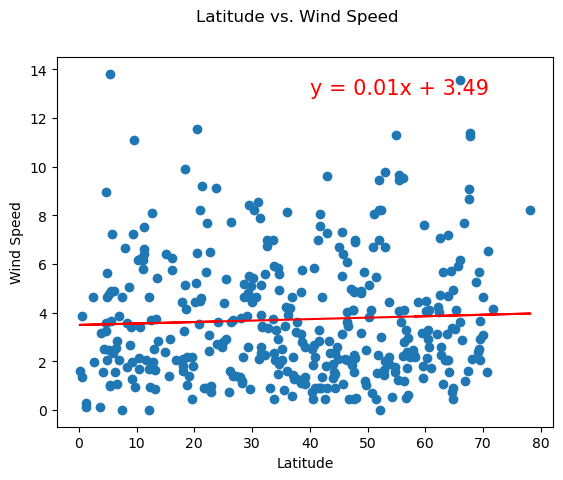

In [21]:
# Northern Hemisphere

lw_nh_plotx=northern_hemi_df["Lat"]
lw_nh_ploty=northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lw_nh_plotx,lw_nh_ploty)
lr_values = lc_nh_plotx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(lw_nh_plotx,lw_nh_ploty)
plt.plot(lw_nh_plotx,lr_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(40,13),fontsize=15,color="red")
plt.suptitle('Latitude vs. Wind Speed')
#plt.tight_layout()
plt.show()

The r-value is 0.02506169825548702


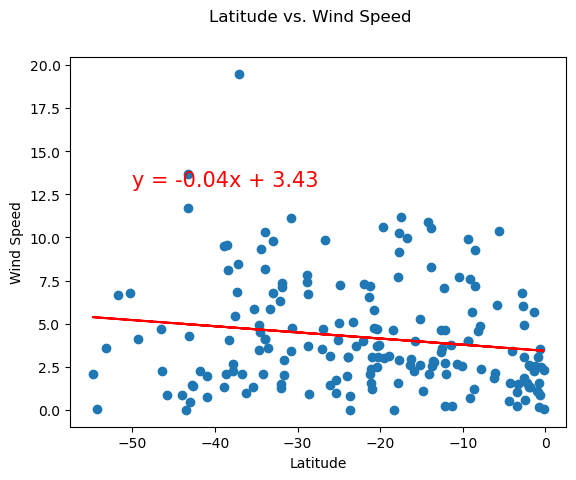

In [22]:
# Southern Hemisphere

lw_sh_plotx=southern_hemi_df["Lat"]
lw_sh_ploty=southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lw_sh_plotx,lw_sh_ploty)
lr_values = lw_sh_plotx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(lw_sh_plotx,lw_sh_ploty)
plt.plot(lw_sh_plotx,lr_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-50,13),fontsize=15,color="red")
plt.suptitle('Latitude vs. Wind Speed')
#plt.tight_layout()
plt.show()

**Discussion about the linear relationship:
The windspeed is more in northern hemispehere compared to southern hemispere but the overall windspeed is constant with the change in latitude for both the hemispeheres. 